In [2]:
isLocalServer = False
sys_path_to_be_added = '/notebook/personal/ksuchoi216/temp_experiment_analysis/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print('='*60)
    print(f'isLocalServer is {isLocalServer}')
    print('='*60)
    
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)
 
checkLocalServer(isLocalServer, sys_path_to_be_added)

!pwd
print('='*60)

import configparser

cfg = configparser.ConfigParser()
cfg.read('./configs/config.ini')

isLocalServer is False
/Volumes/ssd/code/temp_experiment_analysis


['./configs/config.ini']

# FSR Distribution

Copyright © 2022 Algorigo Inc. All Rights Reserved.


In [3]:
import os
import sys
import time
from datetime import datetime
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_preprocessing import get_data_path
from data_preprocessing import convert_df_withoutKey
from data_preprocessing import calculate_statistics
from data_preprocessing import plotEachFSR

## FSR 80 vs 25

./data/fsr21v_25.csv
amp:  [20]
sens:  [10]
(6346, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30]
selected_values dimension:  (2000, 26)
sensor_mean shape:  (26,)
zero_indice:  []
org mean:  3128.698923076923
Compensation mean: 3128.698923076923


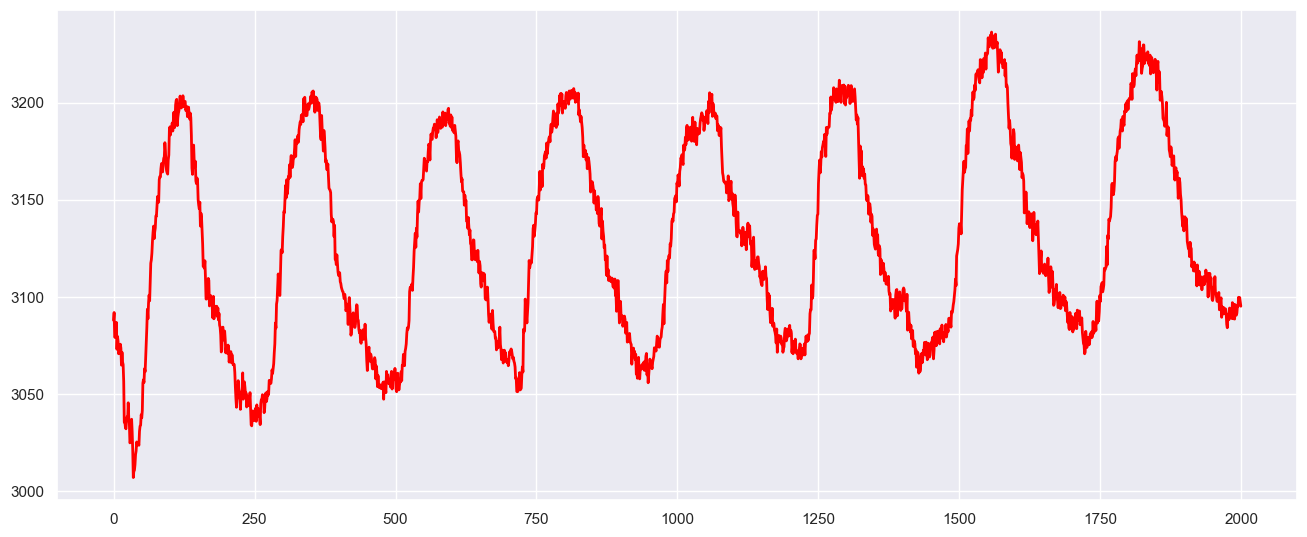

timestamp         mean  compensated_mean
0     1634803230010  3088.000000       3088.000000
1     1634803230010  3092.000000       3092.000000
2     1634803230104  3079.384615       3079.384615
3     1634803230104  3079.076923       3079.076923
4     1634803230104  3082.615385       3082.615385
...             ...          ...               ...
1995  1634803297136  3099.846154       3099.846154
1996  1634803297136  3098.923077       3098.923077
1997  1634803297182  3099.692308       3099.692308
1998  1634803297182  3097.230769       3097.230769
1999  1634803297182  3095.230769       3095.230769

[2000 rows x 3 columns]

./data/fsr21v_80/test1/fsr.csv
amp:  [20]
sens:  [10]
(271479, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30]
selected_values dimension:  (2000, 26)
sensor_mean shape:  (26,)
zero_indice:  []
org mean:  5884.405461538462
Compensation mean: 3744.835635723077


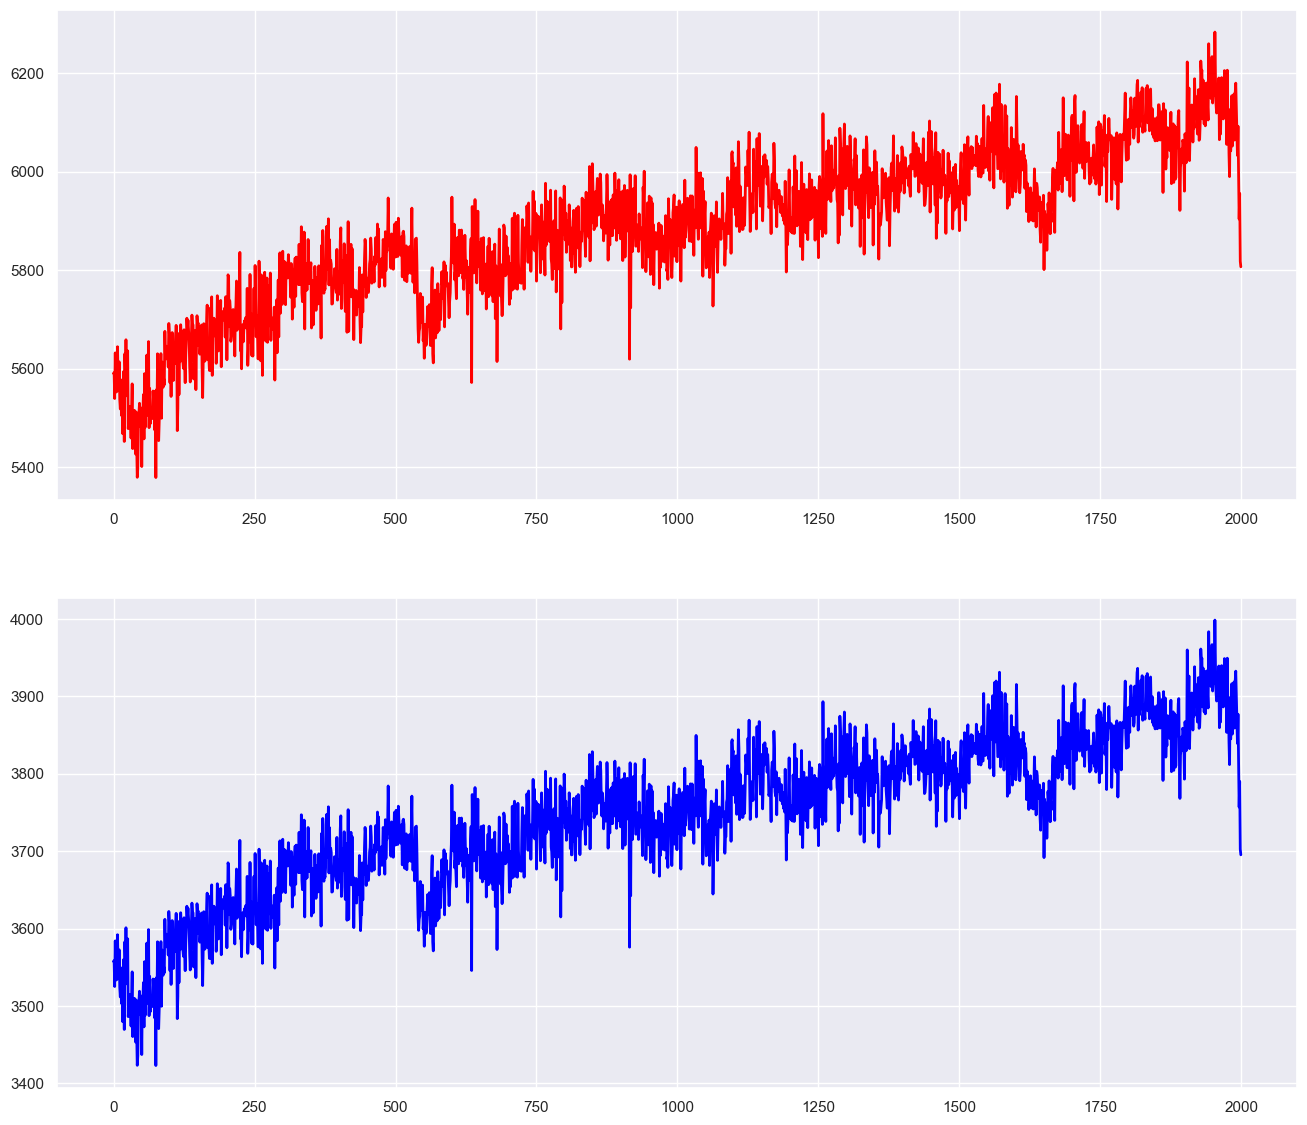

timestamp         mean  compensated_mean
0     1644373843271  5590.153846       3557.573908
1     1644373843298  5591.692308       3558.552985
2     1644373843331  5539.230769       3525.166462
3     1644373843360  5631.846154       3584.106892
4     1644373843405  5552.000000       3533.292800
...             ...          ...               ...
1995  1644373906007  6004.000000       3820.945600
1996  1644373906037  5903.384615       3756.913969
1997  1644373906068  5955.538462       3790.104677
1998  1644373906098  5817.846154       3702.477292
1999  1644373906126  5806.615385       3695.330031

[2000 rows x 3 columns]

percentage of error:  119.69


In [27]:
# back_FSR = [1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 21, 22, 23, 24]
# selected_FSR = [13, 14, 15, 16, 25, 26, 27, 28]+back_FSR

all_FSR = list(range(0, 32))
# delete_FSR = [26, 14, 27, 15, 31, 13, 0, 25, 28, 16, 30] # 상위 센서를 뺌
# delete_FSR = [26, 14, 27, 15, 5, 24] # 상위 센서를 뺌
delete_FSR = [26, 14, 27, 15, 13, 31] # 상위 센서를 뺌
selected_FSR = [index for index in all_FSR if index not in delete_FSR]

# selected_FSR = all_FSR
RATIO_80 = 0.6364
OFFSET = 0
print('='*70)

path_source_list = [cfg['PATH']['path_21v_80']]
# folder_name_list = ['test1', 'test2', 'test3', 'test4', 'test5']
folder_name_list = ['test1']
data_range_list = [ [49500, 51500], [], [6000, 8000], [109000, 110000], [109000, 110000]] 

# plotEachFSR(path_source_list,
#             folder_name_list,
#             data_range_list = data_range_list,
#             upper_bound=None, lower_bound=None,
#             selected_FSR = selected_FSR,
#             isPlot=True,
#             offset=OFFSET)
# plt.show()


PATH_DATA_FSR = get_data_path(cfg, degree=25)

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_25, df_25 = calculate_statistics(df, without_ratio = True,
                     selected_FSR_list = selected_FSR,
                     start_point=2000, end_point=4000)
plt.show()
display(df_25)


PATH_DATA_FSR = get_data_path(cfg, degree=80, FolderName='test1')

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_80, df_80 = calculate_statistics(df,
                     ratio=RATIO_80, without_ratio = False,
                     selected_FSR_list = selected_FSR,
                     start_point=49500, end_point=51500,
                     offset=OFFSET)
plt.show()
display(df_80)


error_percentage = np.round(((mean_80)/mean_25)*100, 2)

print('='*70)
print('percentage of error: ', error_percentage)
print('='*70)

## FSR -30 vs 25

./data/fsr21v_m30/test1/fsr.csv
values: (3701, 32)
selected_FSR: [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
np mean:
  [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 1.708000e+00 3.110000e+00 1.058520e+02 1.694920e+02 2.207680e+02
 3.663820e+02 4.902720e+02 6.949360e+02 6.957620e+02 7.229840e+02
 8.057360e+02 1.238208e+03 1.775284e+03 2.620132e+03 2.670082e+03
 3.512864e+03 4.313452e+03]
ascending sort FSR:
 [11 21 20 18 17 29 12  8 23  5  4  3  2  1  7 16 24 22 19 13  9  6 10 25
 28 30  0 31 26 15 14 27]
np min:
  [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.   64.  396. 1296. 1396. 2092. 2968.]
ascending sort FSR:
 [13 24 23 22 21 20 19 18 17 16 30 29 25 28 11 10  9  8  7  6  5  4  3  2
  1 12  0 31 1

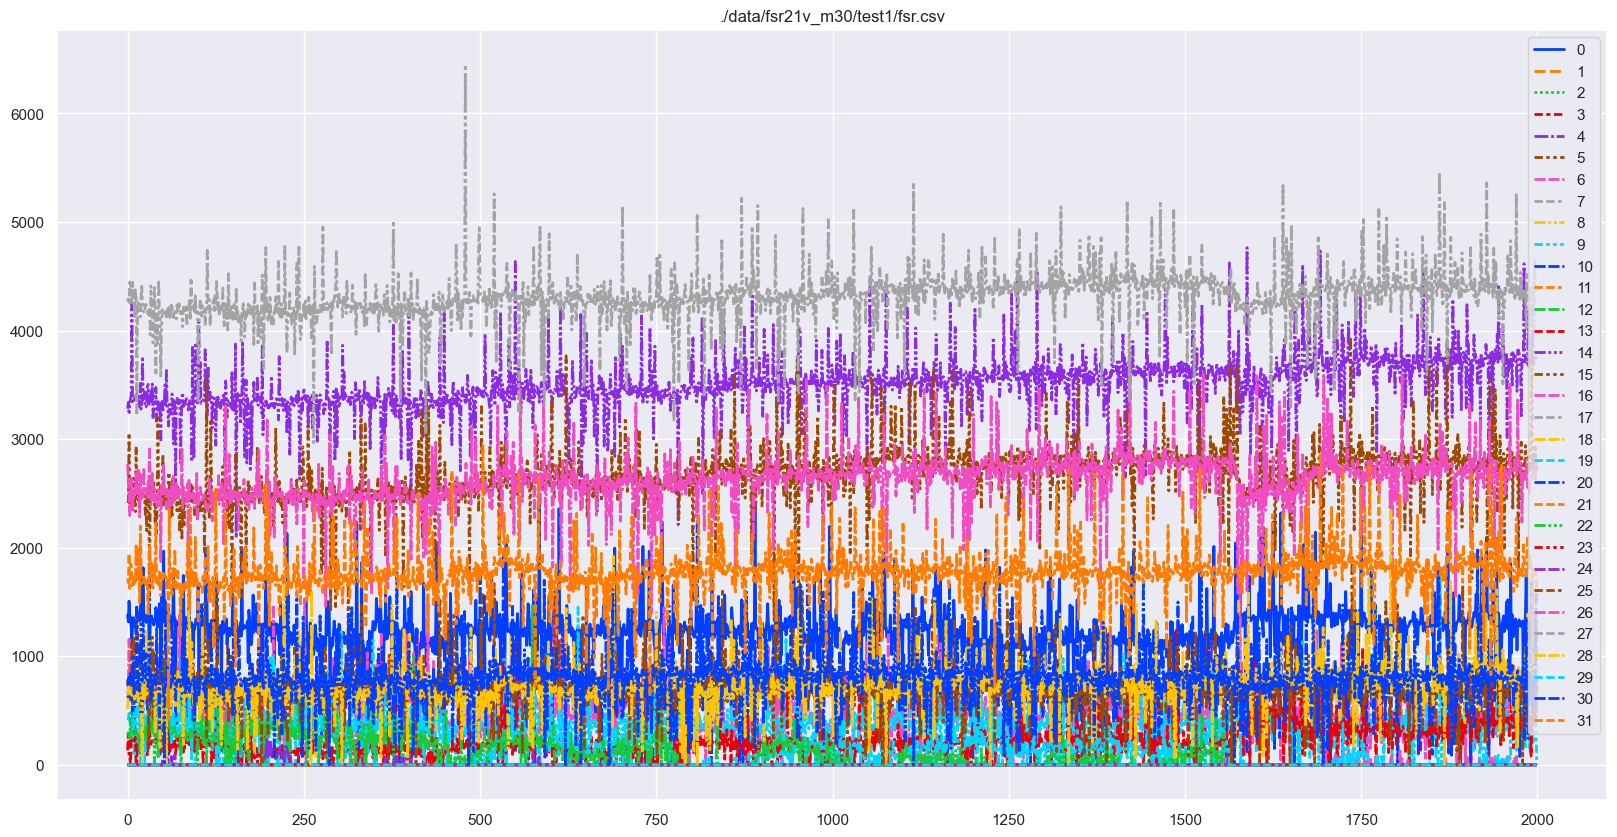

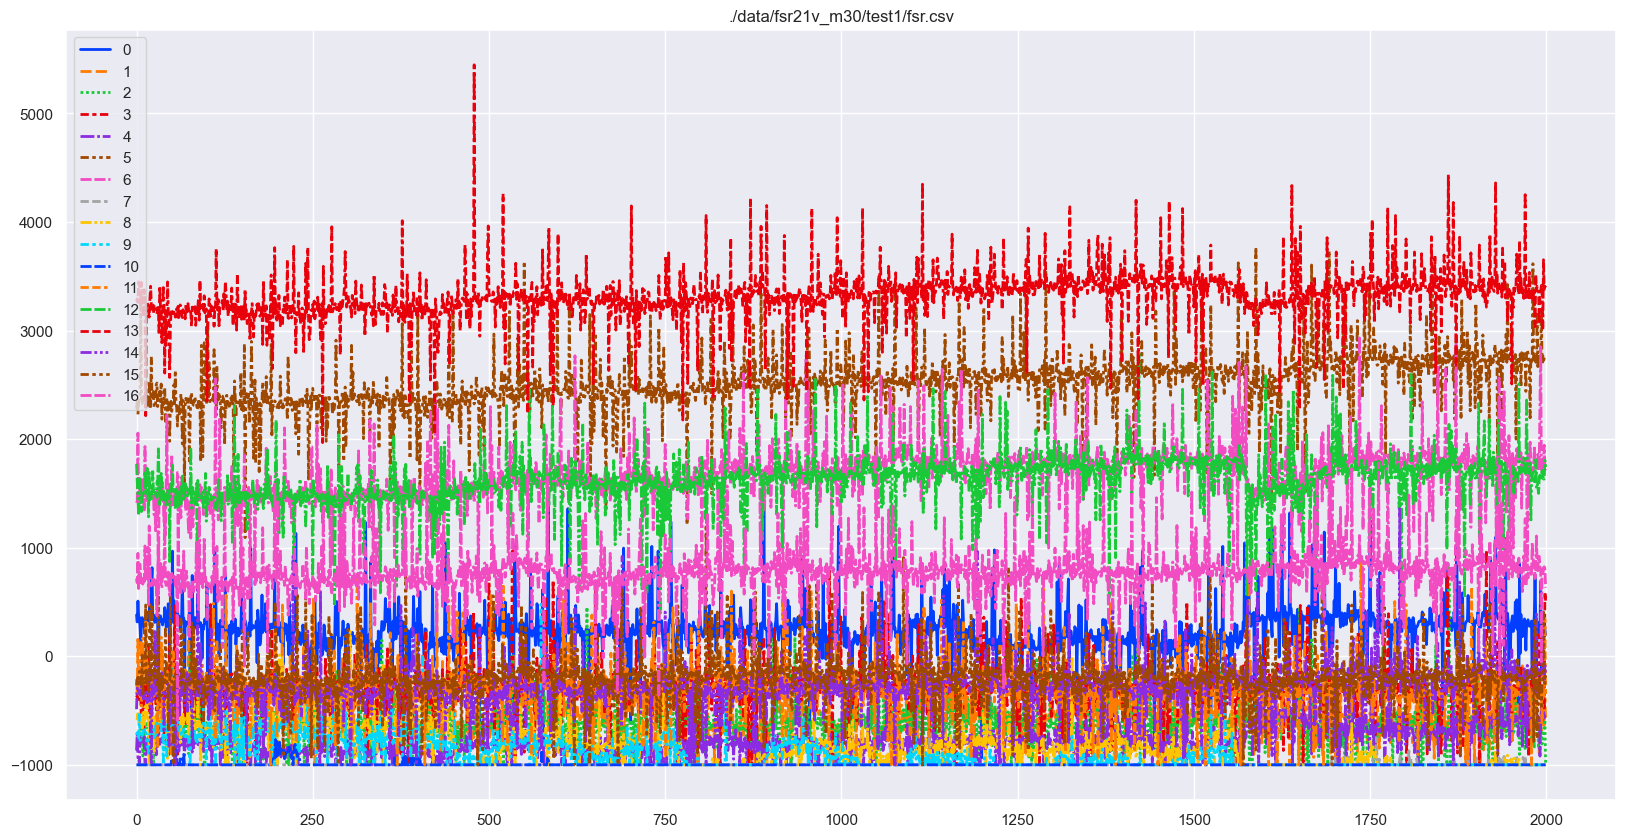

./data/fsr21v_25.csv
amp:  [20]
sens:  [10]
(6346, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
selected_values dimension:  (2000, 17)
sensor_mean shape:  (17,)
zero_indice:  []
org mean:  3311.542117647059
Compensation mean: 3311.5421176470586


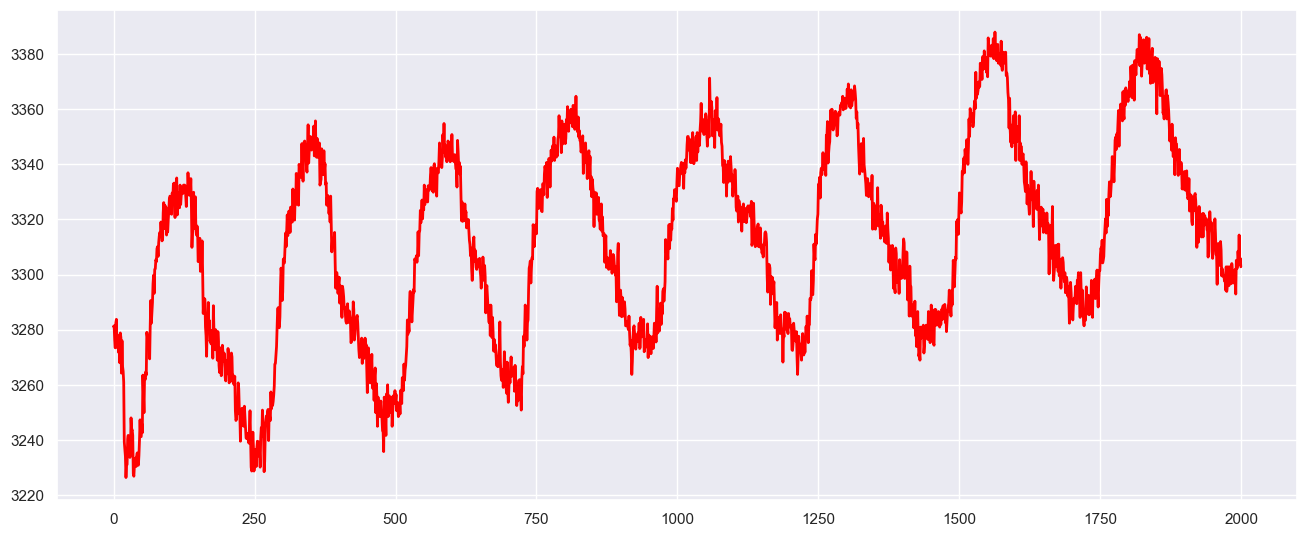

./data/fsr21v_m30/test1/fsr.csv
amp:  [20]
sens:  [10]
(3700, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
selected_values dimension:  (2000, 17)
sensor_mean shape:  (17,)
zero_indice:  []
org mean:  1200.4131764705883
Compensation mean: 3094.064962352941


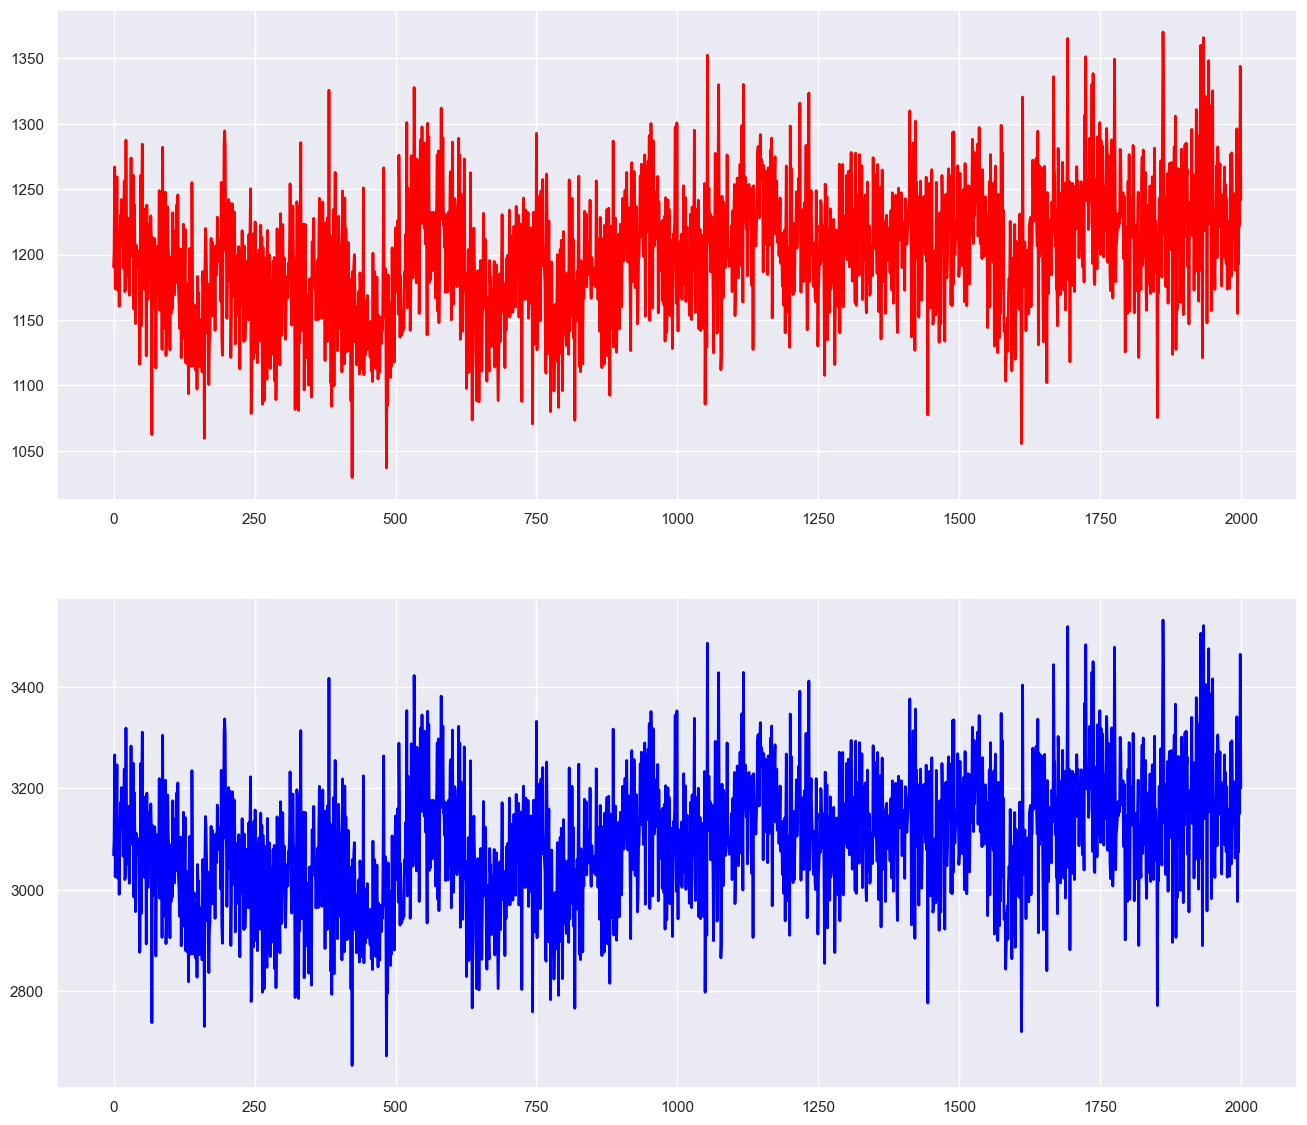

percentage of error:  93.43


In [ ]:
# all_FSR = list(range(0, 32))
zero_FSR = [1, 2, 3, 4, 5, 7, 8, 11, 12, 17, 18, 20, 21, 23, 29]
# delete_FSR = zero_FSR + [16, 24, 22, 19]
delete_FSR = zero_FSR

selected_FSR = [index for index in all_FSR if index not in delete_FSR]

# selected_FSR = list(range(0, 32))

RATIO_m30 = 2.5775

print('='*70)

path_source_list = [cfg['PATH']['path_21v_m30']]
# folder_name_list = ['test1', 'test2', 'test3', 'test4', 'test5']
folder_name_list = ['test1']
data_range_list = [ [1000, 3000], [500, 2500], [1500, 3500], [1000, 3000], [1000, 3000]] 

plotEachFSR(path_source_list,
            folder_name_list,
            data_range_list = data_range_list,
            upper_bound=None, lower_bound=None,
            selected_FSR = selected_FSR,
            isPlot=True)
plt.show()


PATH_DATA_FSR = get_data_path(cfg, degree=25)

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_25 = calculate_statistics(df, without_ratio = True,
                     selected_FSR_list = selected_FSR,
                     start_point=2000, end_point=4000)
plt.show()


PATH_DATA_FSR = get_data_path(cfg, degree=-30, FolderName='test1')

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_m30 = calculate_statistics(df,
                     ratio=RATIO_m30, without_ratio = False,
                     selected_FSR_list = selected_FSR,
                     start_point=1000, end_point=3000)
plt.show()


error_percentage = np.round((mean_m30/mean_25)*100, 2)

print('='*70)
print('percentage of error: ', error_percentage)
print('='*70)



# FOR GRAPH

## 80

./data/fsr21v_80/test1/fsr.csv
amp:  [20]
sens:  [10]
(271479, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30]
selected_values dimension:  (2000, 26)
sensor_mean shape:  (26,)
zero_indice:  []
org mean:  5884.405461538462
c_mean: 3744.835635723077


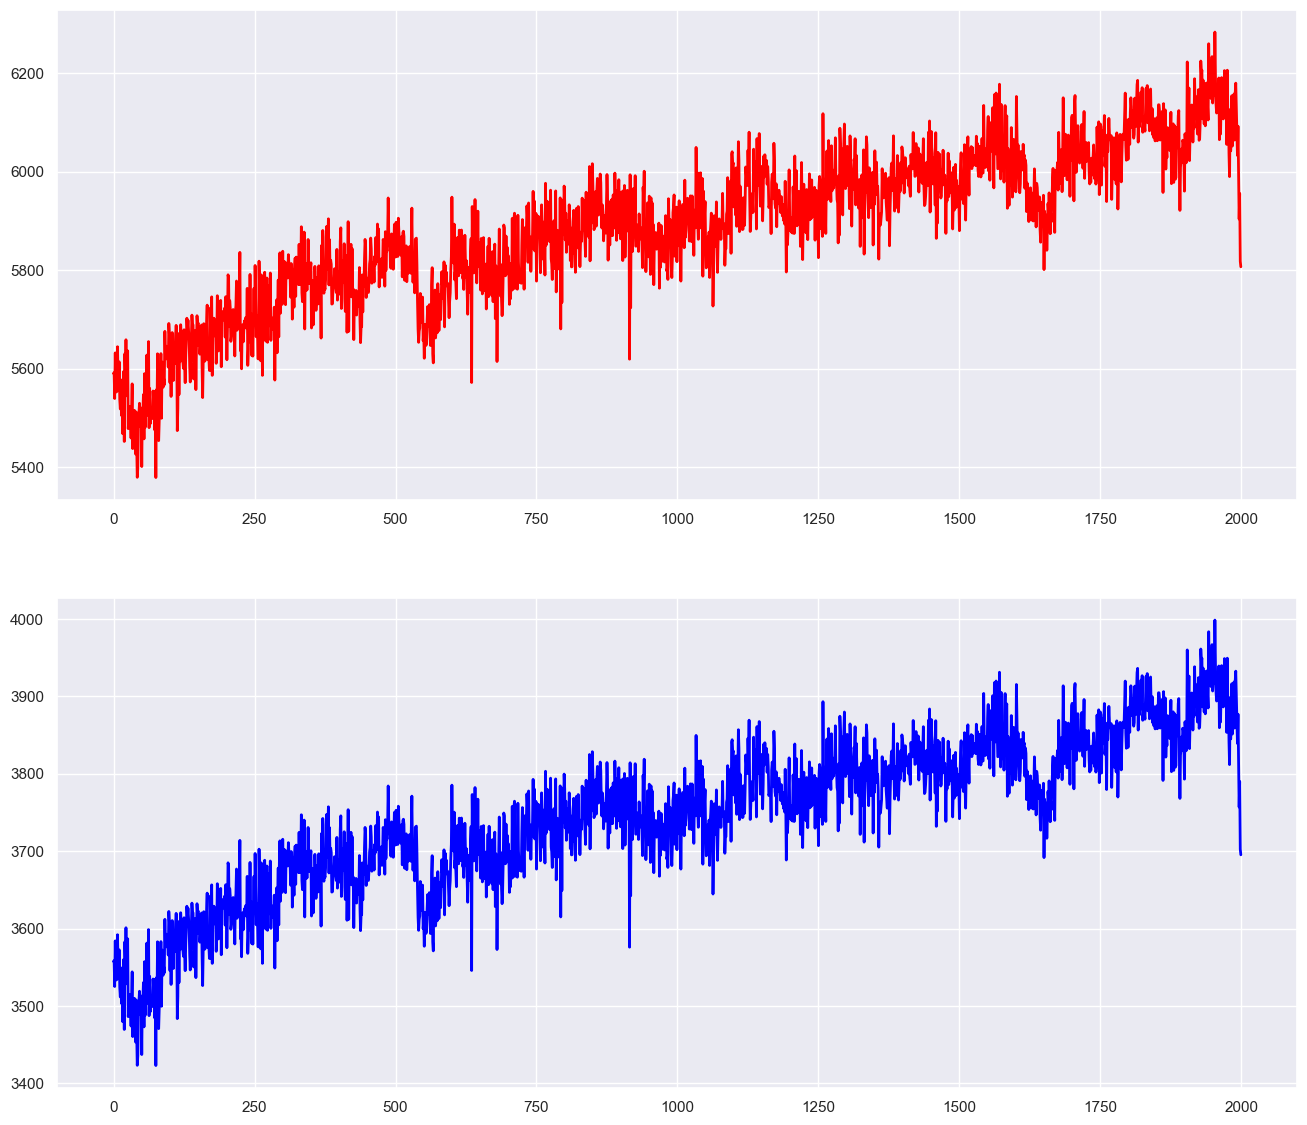

mean_80    c_mean_80
0     5590.153846  3557.573908
1     5591.692308  3558.552985
2     5539.230769  3525.166462
3     5631.846154  3584.106892
4     5552.000000  3533.292800
...           ...          ...
1995  6004.000000  3820.945600
1996  5903.384615  3756.913969
1997  5955.538462  3790.104677
1998  5817.846154  3702.477292
1999  5806.615385  3695.330031

[2000 rows x 2 columns]

In [36]:
all_FSR = list(range(0, 32))
delete_FSR = [26, 14, 27, 15, 13, 31] # 상위 센서를 뺌
selected_FSR = [index for index in all_FSR if index not in delete_FSR]

RATIO_80 = 0.6364
OFFSET = 0
print('='*70)

PATH_DATA_FSR = get_data_path(cfg, degree=80, FolderName='test1')

df_fsr = pd.read_csv(PATH_DATA_FSR)
# display(df_fsr.head())

df = convert_df_withoutKey(df_fsr)

mean_80, df_80 = calculate_statistics(df,
                     ratio=RATIO_80, without_ratio = False,
                     selected_FSR_list = selected_FSR,
                     start_point=49500, end_point=51500,
                     offset=OFFSET)
plt.show()

df_80 = df_80.drop('timestamp', axis=1)
df_80 = df_80.rename(columns={'mean':'mean_80', 'c_mean': 'c_mean_80'})
display(df_80)

## -30

./data/fsr21v_m30/test1/fsr.csv
amp:  [20]
sens:  [10]
(3700, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 6, 9, 10, 13, 14, 15, 16, 19, 22, 24, 25, 26, 27, 28, 30, 31]
selected_values dimension:  (2000, 17)
sensor_mean shape:  (17,)
zero_indice:  []
org mean:  1200.4131764705883
c_mean: 3094.064962352941


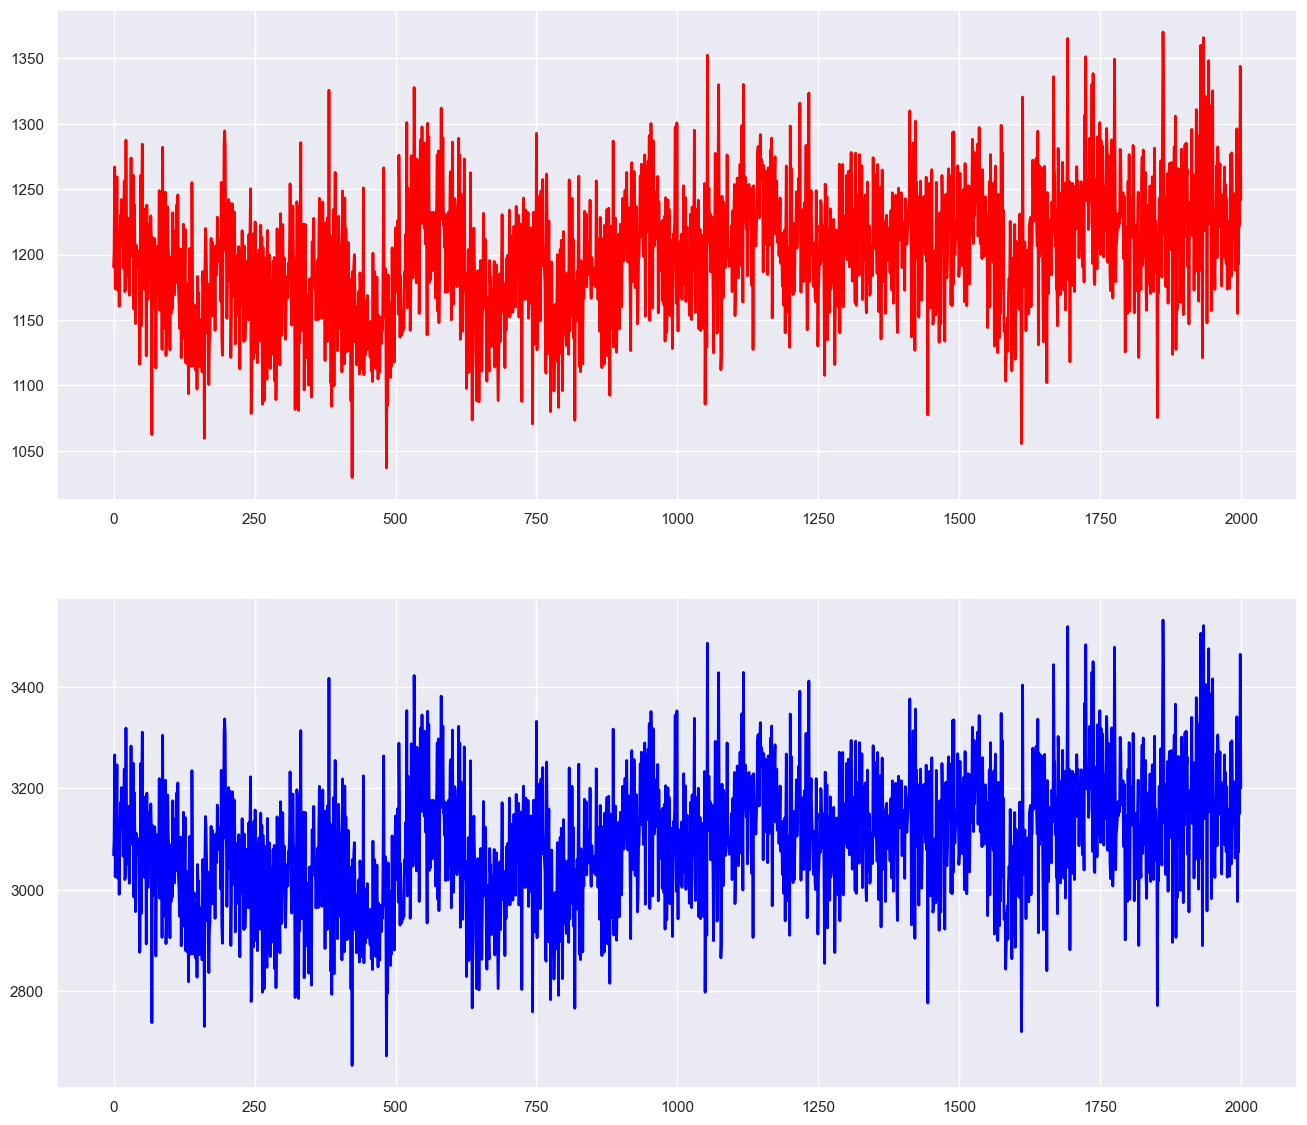

mean_m30   c_mean_m30
0     1190.588235  3068.741176
1     1203.294118  3101.490588
2     1267.058824  3265.844118
3     1173.882353  3025.681765
4     1213.647059  3128.175294
...           ...          ...
1995  1192.941176  3074.805882
1996  1274.823529  3285.857647
1997  1222.352941  3150.614706
1998  1344.000000  3464.160000
1999  1241.882353  3200.951765

[2000 rows x 2 columns]

In [40]:
zero_FSR = [1, 2, 3, 4, 5, 7, 8, 11, 12, 17, 18, 20, 21, 23, 29]
delete_FSR = zero_FSR
selected_FSR = [index for index in all_FSR if index not in delete_FSR]
RATIO_m30 = 2.5775

print('='*70)

PATH_DATA_FSR = get_data_path(cfg, degree=-30, FolderName='test1')
df_fsr = pd.read_csv(PATH_DATA_FSR)

df = convert_df_withoutKey(df_fsr)

mean_m30, df_m30 = calculate_statistics(df,
                     ratio=RATIO_m30, without_ratio = False,
                     selected_FSR_list = selected_FSR,
                     start_point=1000, end_point=3000)
plt.show()

df_m30 = df_m30.drop('timestamp', axis=1)
df_m30 = df_m30.rename(columns={'mean':'mean_m30', 'c_mean': 'c_mean_m30'})
display(df_m30)

## 25

./data/fsr21v_25.csv
amp:  [20]
sens:  [10]
(6346, 7)
org values dimension:  (2000, 32)
selected FSR list:  [0, 6, 9, 10, 16, 19, 22, 24, 25, 28, 30]
selected_values dimension:  (2000, 11)
sensor_mean shape:  (11,)
zero_indice:  []
org mean:  3245.628909090909
c_mean: 3245.6289090909086


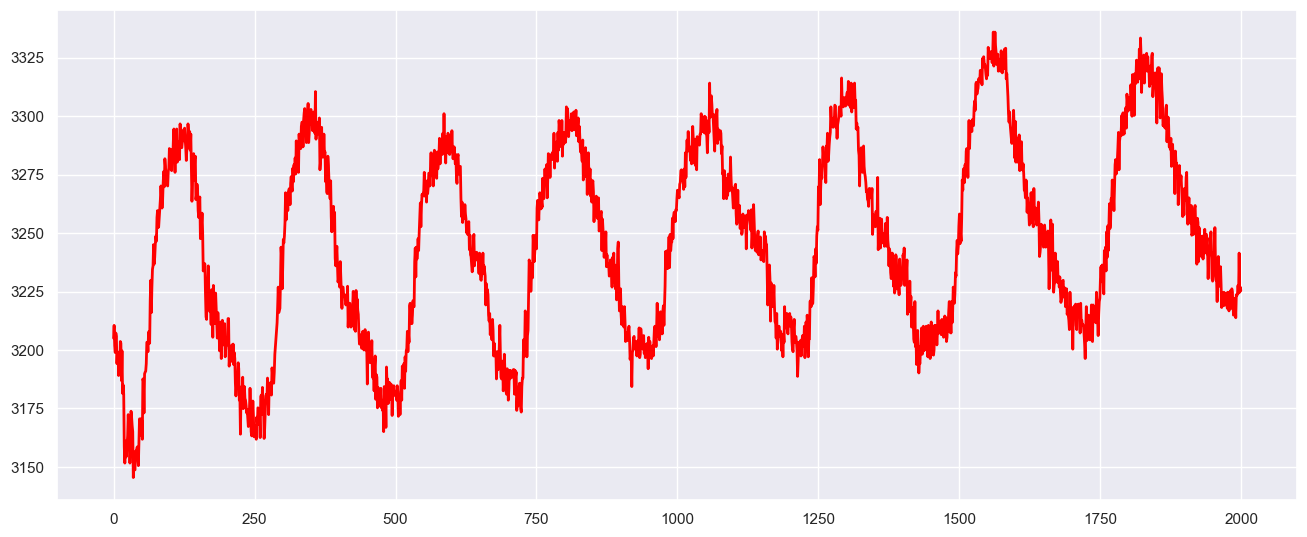

mean_25    c_mean_25
0     3205.090909  3205.090909
1     3210.545455  3210.545455
2     3201.818182  3201.818182
3     3198.909091  3198.909091
4     3207.272727  3207.272727
...           ...          ...
1995  3224.363636  3224.363636
1996  3241.454545  3241.454545
1997  3224.727273  3224.727273
1998  3226.909091  3226.909091
1999  3225.454545  3225.454545

[2000 rows x 2 columns]

In [42]:
zero_FSR = [1, 2, 3, 4, 5, 7, 8, 11, 12, 17, 18, 20, 21, 23, 29]
delete_FSR = zero_FSR + [26, 14, 27, 15, 13, 31]
selected_FSR = [index for index in all_FSR if index not in delete_FSR]
PATH_DATA_FSR = get_data_path(cfg, degree=25)
df_fsr = pd.read_csv(PATH_DATA_FSR)

df = convert_df_withoutKey(df_fsr)

mean_25, df_25 = calculate_statistics(df, without_ratio = True,
                     selected_FSR_list = selected_FSR,
                     start_point=2000, end_point=4000)
plt.show()

df_25 = df_25.drop('timestamp', axis=1)
df_25 = df_25.rename(columns={'mean':'mean_25', 'c_mean': 'c_mean_25'})
display(df_25)

mean_80    c_mean_80     mean_m30   c_mean_m30      mean_25  \
0     5590.153846  3557.573908  1190.588235  3068.741176  3205.090909   
1     5591.692308  3558.552985  1203.294118  3101.490588  3210.545455   
2     5539.230769  3525.166462  1267.058824  3265.844118  3201.818182   
3     5631.846154  3584.106892  1173.882353  3025.681765  3198.909091   
4     5552.000000  3533.292800  1213.647059  3128.175294  3207.272727   
...           ...          ...          ...          ...          ...   
1995  6004.000000  3820.945600  1192.941176  3074.805882  3224.363636   
1996  5903.384615  3756.913969  1274.823529  3285.857647  3241.454545   
1997  5955.538462  3790.104677  1222.352941  3150.614706  3224.727273   
1998  5817.846154  3702.477292  1344.000000  3464.160000  3226.909091   
1999  5806.615385  3695.330031  1241.882353  3200.951765  3225.454545   

        c_mean_25  
0     3205.090909  
1     3210.545455  
2     3201.818182  
3     3198.909091  
4     3207.272727  
...           ...  
1995  3224.363636  
1996  3241.454545  
1997  3224.727273  
1998  3226.909091  
1999  3225.454545  

[2000 rows x 6 columns]

mean_80     mean_m30      mean_25
0     5590.153846  1190.588235  3205.090909
1     5591.692308  1203.294118  3210.545455
2     5539.230769  1267.058824  3201.818182
3     5631.846154  1173.882353  3198.909091
4     5552.000000  1213.647059  3207.272727
...           ...          ...          ...
1995  6004.000000  1192.941176  3224.363636
1996  5903.384615  1274.823529  3241.454545
1997  5955.538462  1222.352941  3224.727273
1998  5817.846154  1344.000000  3226.909091
1999  5806.615385  1241.882353  3225.454545

[2000 rows x 3 columns]

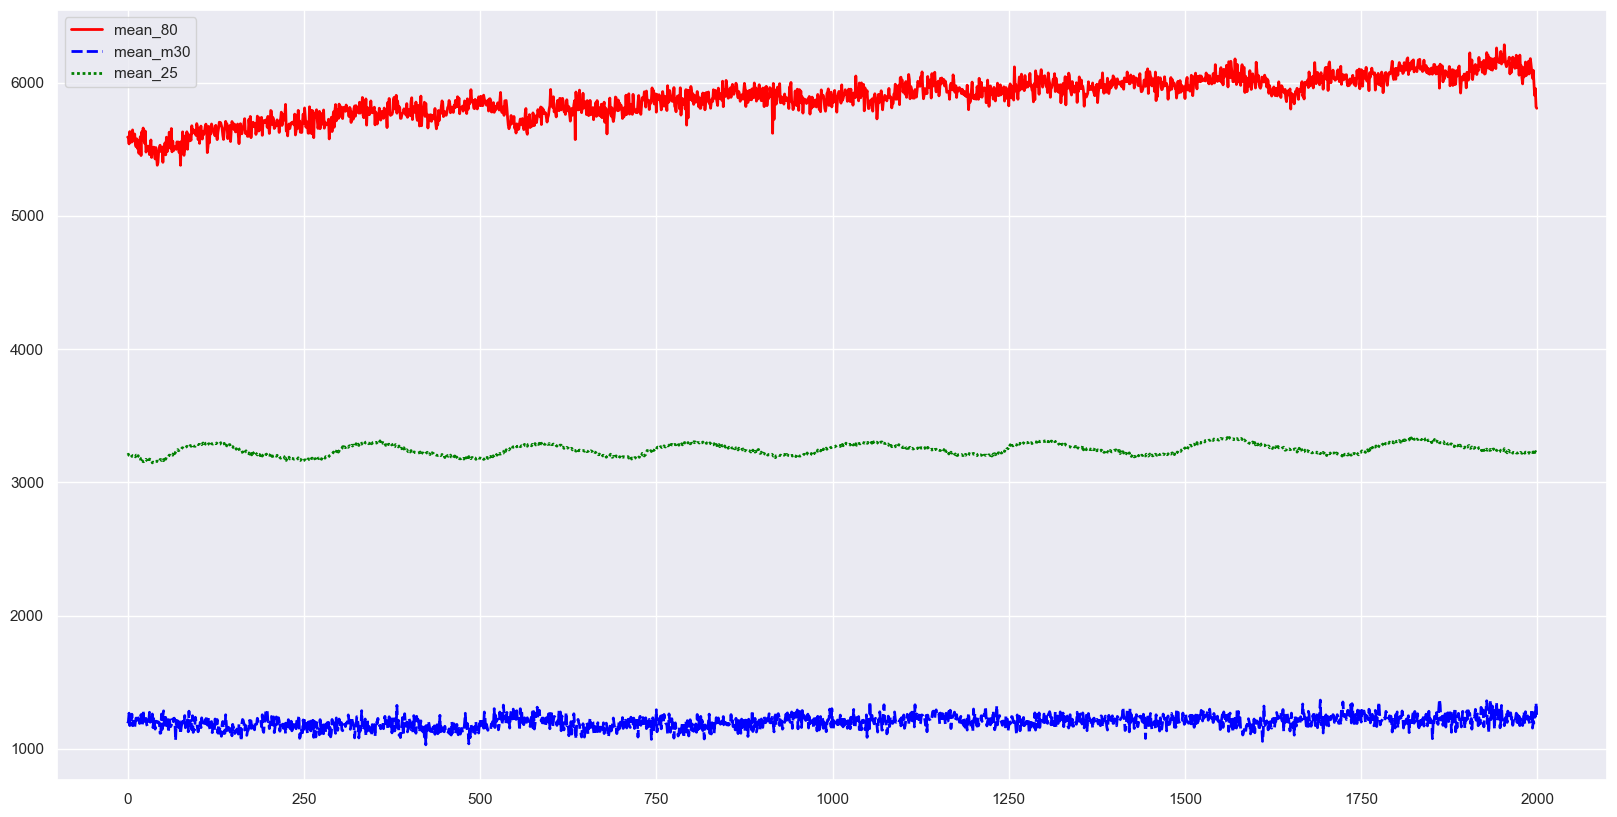

mean_80     mean_m30      mean_25
0     5590.153846  1190.588235  3205.090909
1     5591.692308  1203.294118  3210.545455
2     5539.230769  1267.058824  3201.818182
3     5631.846154  1173.882353  3198.909091
4     5552.000000  1213.647059  3207.272727
...           ...          ...          ...
1995  6004.000000  1192.941176  3224.363636
1996  5903.384615  1274.823529  3241.454545
1997  5955.538462  1222.352941  3224.727273
1998  5817.846154  1344.000000  3226.909091
1999  5806.615385  1241.882353  3225.454545

[2000 rows x 3 columns]

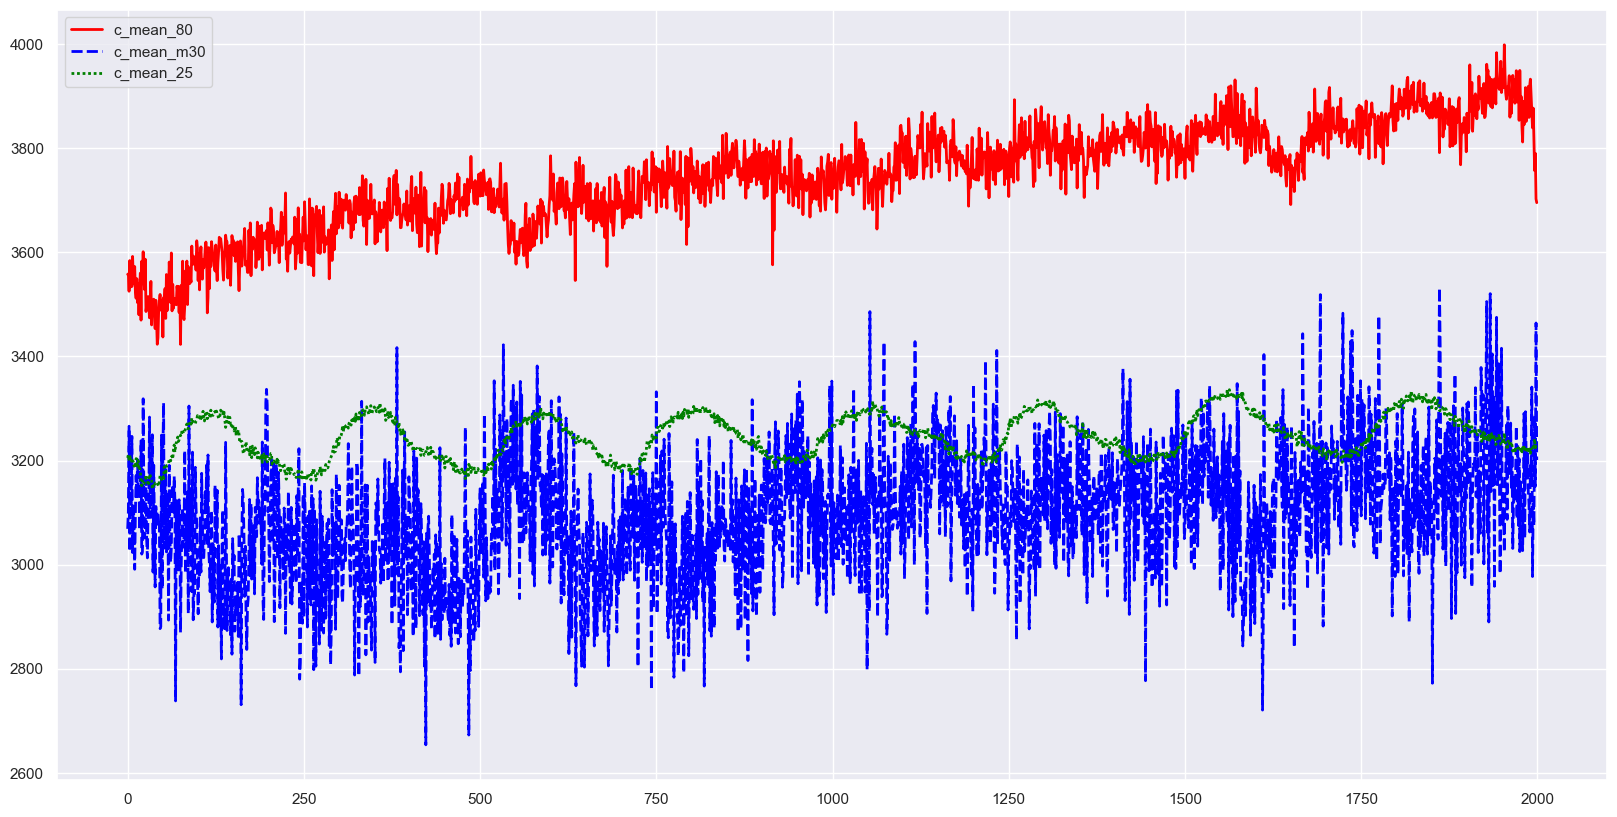

In [57]:
df_total = pd.concat([df_80, df_m30, df_25], axis=1)
display(df_total)

df_before = df_total.drop(['c_mean_80', 'c_mean_m30', 'c_mean_25'], axis=1)
display(df_before)
sns.lineplot(data=df_before,  palette=['red','blue', 'green'], legend='full')
plt.show()

df_after = df_total.drop(['mean_80', 'mean_m30', 'mean_25'], axis=1)
display(df_before)
sns.lineplot(data=df_after, palette=['red','blue', 'green'], legend='full')
plt.show()


# FSR selection

In [ ]:
from data_preprocessing import get_data_path
from data_preprocessing import convert_df_withoutKey, calculate_statistics
import pandas as pd
import matplotlib.pyplot as plt

## FSR 21v 80

./data/fsr21v_80/test1/fsr.csv
amp:  [20]
sens:  [10]
(271479, 7)
start-end point:  None None
org values dimension:  (271479, 32)
sensor_mean shape:  (32,)
zero_indice:  []
org mean:  249.44229848349227
Compensation mean: 249.44229848349227


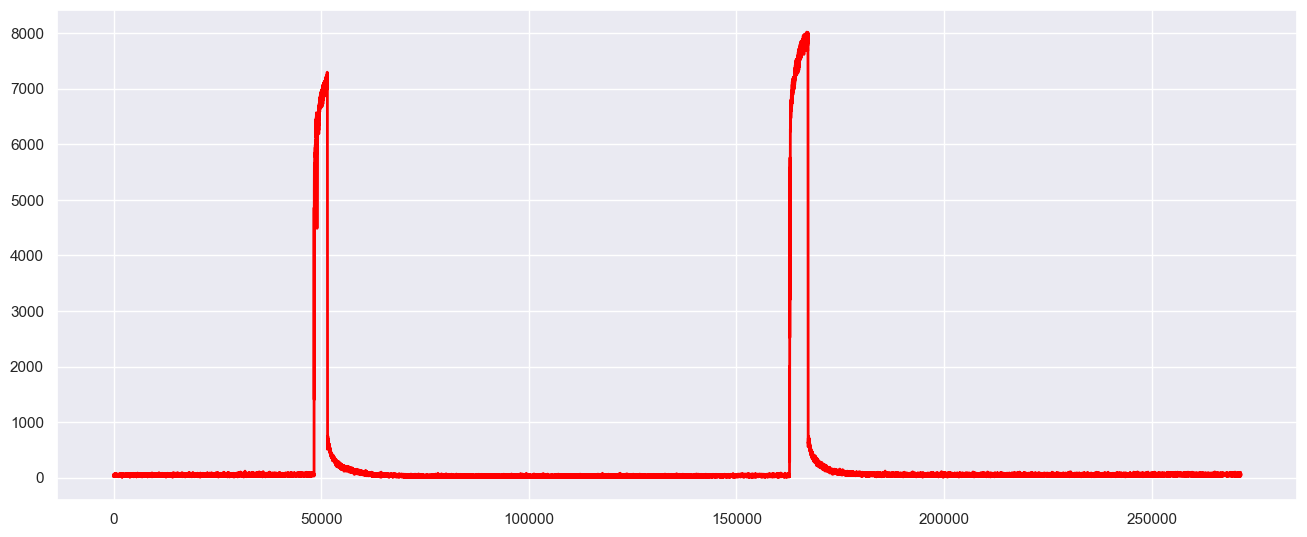

In [20]:
data_range_list = [ [49500, 51500], [], [6000, 8000], [109000, 110000], [109000, 110000]]
for testNo in range(1, 6):
    if testNo > 1:
        break
    FolderName = 'test'+str(testNo)
    
    PATH_DATA_FSR = get_data_path(cfg, degree=80, FolderName=FolderName)

    if not os.path.exists(PATH_DATA_FSR):
        continue

    df_fsr = pd.read_csv(PATH_DATA_FSR)
    # display( df_fsr.head() )


    from data_preprocessing import convert_df_withoutKey
    df = convert_df_withoutKey(df_fsr)
    
    from data_preprocessing import calculate_statistics
     
    RATIO = 0.6977
    num = testNo-1
    # start_point = data_range_list[num][0]
    # end_point = data_range_list[num][1]
    
    start_point = None
    end_point = None
    
    print('start-end point: ', start_point, end_point)
    calculate_statistics(df,
                        ratio = RATIO, without_ratio=True,
                        start_point=start_point, end_point=end_point)
    plt.show()

## FSR 21v -30

./data/fsr21v_m30/test1/fsr.csv
amp:  [20]
sens:  [10]
(3700, 7)
org values dimension:  (3700, 32)
sensor_mean shape:  (32,)
zero_indice:  [ 1  2  3  4  7  8 12]
org mean:  656.5627702702702
Compensation mean: 656.5627702702702


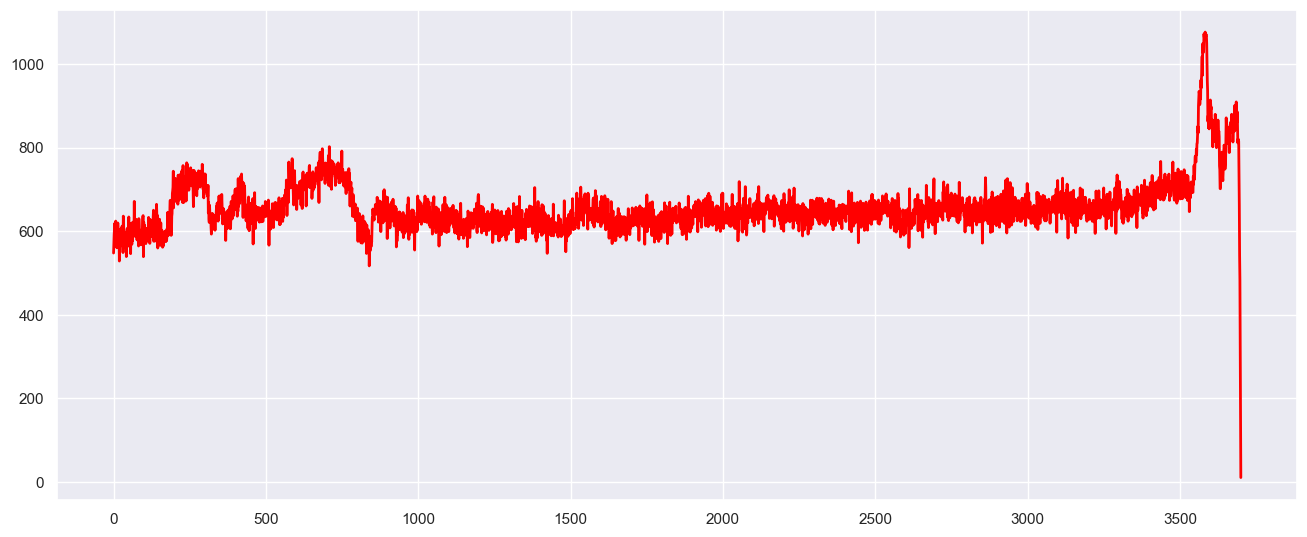

./data/fsr21v_m30/test2/fsr.csv
amp:  [20]
sens:  [10]
(2662, 7)
org values dimension:  (2662, 32)
sensor_mean shape:  (32,)
zero_indice:  [ 1  2  3  4  7  8 12]
org mean:  462.6511551465064
Compensation mean: 462.65115514650637


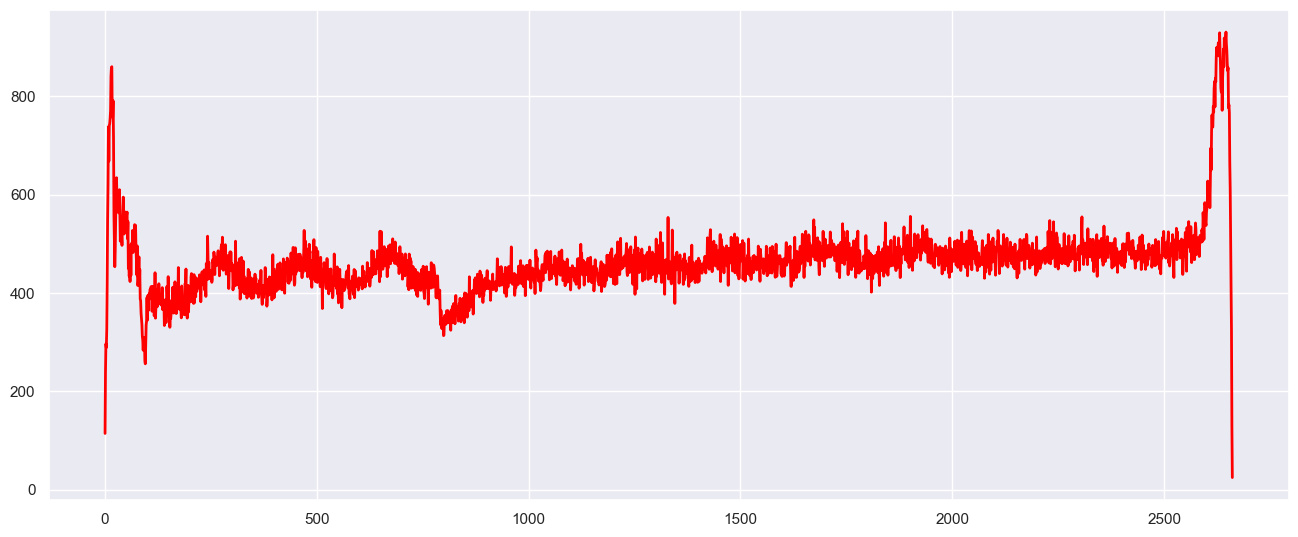

./data/fsr21v_m30/test3/fsr.csv
amp:  [20]
sens:  [10]
(4419, 7)
org values dimension:  (4419, 32)
sensor_mean shape:  (32,)
zero_indice:  [ 2  3  4  8 12 17 21]
org mean:  541.6927755148224
Compensation mean: 541.6927755148223


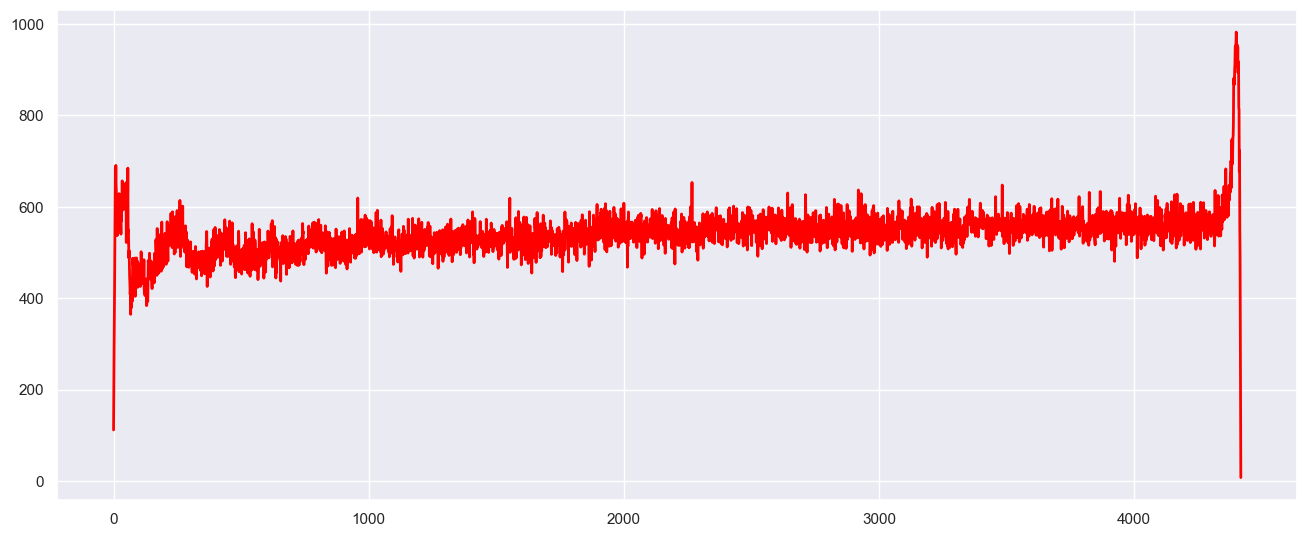

./data/fsr21v_m30/test4/fsr.csv
amp:  [20]
sens:  [10]
(4628, 7)
org values dimension:  (4628, 32)
sensor_mean shape:  (32,)
zero_indice:  [ 1  2  3  4  8 12]
org mean:  516.0831892826275
Compensation mean: 516.0831892826275


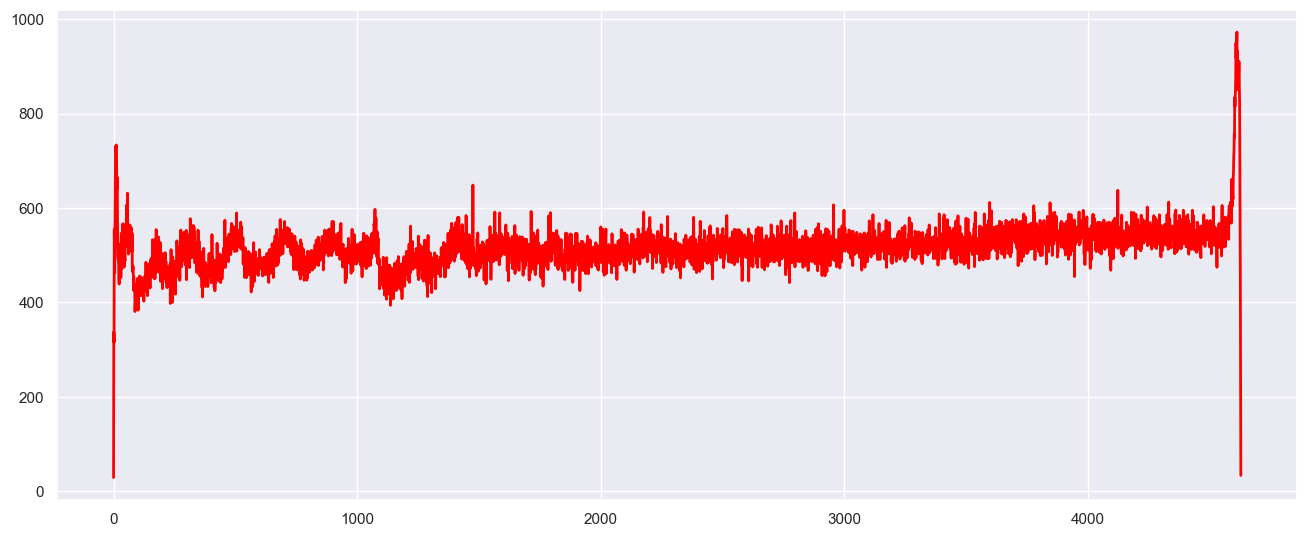

./data/fsr21v_m30/test5/fsr.csv
amp:  [20]
sens:  [10]
(4246, 7)
org values dimension:  (4246, 32)
sensor_mean shape:  (32,)
zero_indice:  [ 1  2  3  4  8 12]
org mean:  546.1331547338672
Compensation mean: 546.1331547338672


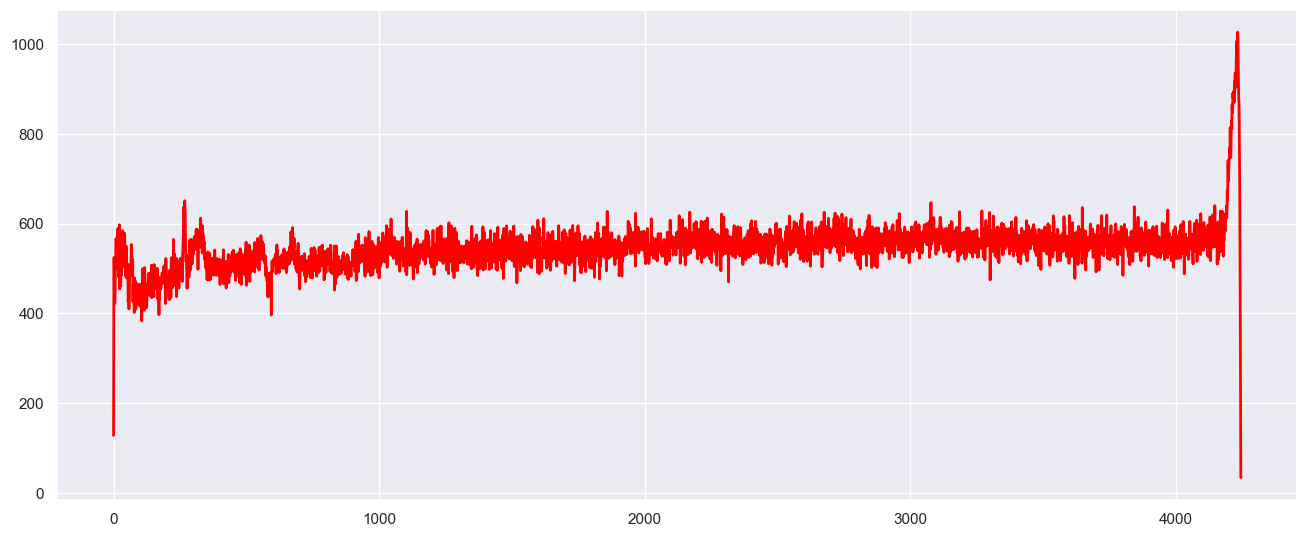

In [9]:
for testNo in range(1, 6):
    PATH_SOURCE = cfg['PATH']['path_21v_m30']
    FOLDER_NAME = 'test'+str(testNo)
    CURRENT_DATA = os.path.join(PATH_SOURCE, FOLDER_NAME)

    # RATIO = 0.5464516840547095

    PATH_DATA_FSR = f'{CURRENT_DATA}/fsr.csv'

    print(PATH_DATA_FSR)

    if not os.path.exists(PATH_DATA_FSR):
        continue
    
    df_fsr = pd.read_csv(PATH_DATA_FSR)
    # display( df_fsr.head() )


    from data_preprocessing import convert_df_withoutKey
    df = convert_df_withoutKey(df_fsr)
    
    from data_preprocessing import calculate_statistics
    
    data_range_list = [ [1000, 3000], [500, 2500], [1500, 3500], [1000, 3000], [1000, 3000]] 
    RATIO = 0.5464516840547095
    calculate_statistics(df,
                        ratio = RATIO, without_ratio=True,
                        start_point=None, end_point=None)
    plt.show()